# Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython.display import Image
import matplotlib.pyplot as plt
import functools

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D, Conv1D, Embedding,Reshape, Concatenate,BatchNormalization,GlobalMaxPooling1D,GlobalAveragePooling1D
from keras.layers.merge import Concatenate
from keras.preprocessing import sequence
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras import regularizers
from keras import metrics
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report


# Training Data

In [2]:
data = pd.read_csv('../splited_full_RASFF_DATA.csv', sep=';', 
                header=0, index_col = 0)
data = data.sample(frac = 1)
df = data
df

,DATE_CASE,NOT_COUNTRY,PROD_CAT,TYPE,RISK_DECISION,ACTION_TAKEN,DISTRIBUTION_STAT,HAZARDS_CAT,COUNT_ORIGEN,COUNT_DESTIN,COUNT_CONCERN
11490,2019-12-23,United Kingdom,"soups, broths, sauces and condiments",food,serious,recall from consumers,distribution to other member countries,allergens,Italy,Malta,Switzerland
85922,2014-01-15,Slovenia,cereals and bakery products,food,serious,recall from consumers,distribution restricted to notifying country,allergens,Italy,Slovenia,
37147,2018-04-20,Luxembourg,fruits and vegetables,food,serious,recall from consumers,distribution to other member countries,food additives and flavourings,China,United Arab Emirates,INFOSAN
43802,2017-11-22,Germany,fats and oils,food,serious,withdrawal from the market,distribution to other member countries,environmental pollutants,Italy,Czech Republic,Commission Services
68508,2015-10-30,France,fats and oils,food,serious,official detention,distribution to other member countries,composition,Ghana,Belgium,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...
58236,2016-10-06,Belgium,compound feeds,feed,serious,withdrawal from the market,distribution to other member countries,environmental pollutants,Belgium,Russia,INFOSAN
80230,2014-08-05,Italy,"nuts, nut products and seeds",food,serious,withdrawal from the market,distribution to other member countries,mycotoxins,Germany,Switzerland,Commission Services
78624,2014-09-05,France,feed materials,feed,serious,informing recipient(s),distribution to other member countries,environmental pollutants,France,Spain,
153357,2005-02-07,Spain,"nuts, nut products and seeds",food,undecided,re-dispatch,no distribution,mycotoxins,United States,,Spain


# Basic Pre-processing

In [3]:
display(len(df))
df['HAZARDS_CAT'] = df['HAZARDS_CAT'].astype(str)
df['DATE_CASE'] = df['DATE_CASE'].astype(str)
df['DATE_CASE'] = pd.to_datetime(df.DATE_CASE, errors='coerce')
df['DATE_CASE'] = df.DATE_CASE.dt.month
df = df.dropna(subset=['DATE_CASE'])
display(len(df))

168188

168187

# Features Selection

In [4]:
features = [0,1,6,8]
target = [2]
X = df.iloc[:,features]
y = df.iloc[:,target]

In [5]:
X

,DATE_CASE,NOT_COUNTRY,DISTRIBUTION_STAT,COUNT_ORIGEN
11490,12.0,United Kingdom,distribution to other member countries,Italy
85922,1.0,Slovenia,distribution restricted to notifying country,Italy
37147,4.0,Luxembourg,distribution to other member countries,China
43802,11.0,Germany,distribution to other member countries,Italy
68508,10.0,France,distribution to other member countries,Ghana
...,...,...,...,...
58236,10.0,Belgium,distribution to other member countries,Belgium
80230,8.0,Italy,distribution to other member countries,Germany
78624,9.0,France,distribution to other member countries,France
153357,2.0,Spain,no distribution,United States


In [6]:
y

,PROD_CAT
11490,"soups, broths, sauces and condiments"
85922,cereals and bakery products
37147,fruits and vegetables
43802,fats and oils
68508,fats and oils
...,...
58236,compound feeds
80230,"nuts, nut products and seeds"
78624,feed materials
153357,"nuts, nut products and seeds"


In [7]:
ency = OneHotEncoder(handle_unknown='ignore', sparse = False)
ency.fit(y.values)
y_one_hot = ency.transform(y.values)

# Test Data

## Loaded

In [8]:
#Este dataset que carga aquí no se usa nunca. Se sobreescriben sus variables.
'''
data = pd.read_csv('../splited_2019_RASFF_DATA_16092019.csv', sep=';', 
                header=0, index_col = 0)
data = data.sample(frac = 1)
test = data
test
'''

"\ndata = pd.read_csv('../splited_2019_RASFF_DATA_16092019.csv', sep=';', \n                header=0, index_col = 0)\ndata = data.sample(frac = 1)\ntest = data\ntest\n"

## Preprocessing

In [9]:
'''
test['HAZARDS_CAT'] = test['HAZARDS_CAT'].astype(str)
test['DATE_CASE'] = test['DATE_CASE'].astype(str)
test['DATE_CASE'] =pd.to_datetime(test.DATE_CASE)
test['DATE_CASE'] = test.DATE_CASE.dt.month
'''

"\ntest['HAZARDS_CAT'] = test['HAZARDS_CAT'].astype(str)\ntest['DATE_CASE'] = test['DATE_CASE'].astype(str)\ntest['DATE_CASE'] =pd.to_datetime(test.DATE_CASE)\ntest['DATE_CASE'] = test.DATE_CASE.dt.month\n"

## Features

In [10]:
features = [0,1,6,8]
target = [2]
'''
X_val = test.iloc[:,features]
y_val = test.iloc[:,target]
'''

'\nX_val = test.iloc[:,features]\ny_val = test.iloc[:,target]\n'

In [11]:
#y_val_one_hot = ency.transform(y_val.values)

# Split train-test-val

In [12]:
categoical_vars = ['DATE_CASE','NOT_COUNTRY','DISTRIBUTION_STAT','COUNT_ORIGEN']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2)

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42,shuffle = True)

# Coding and conversion to lists for being able to introduce it into the model

In [15]:
def preproc(X_train, X_test, Xvalidation_data):
    input_list_train = []
    input_list_test = []
    input_list_testval = []
    
    for c in categoical_vars:
        raw_vals = np.unique(X_train[c])
        val_map = {}
        for i in range(len(raw_vals)):
            val_map[raw_vals[i]] = i       
        
        input_list_train.append(X_train[c].map(val_map).values)
        input_list_test.append(X_test[c].map(val_map).fillna(0).values)
        input_list_testval.append(X_val[c].map(val_map).fillna(0).values)

    return input_list_train, input_list_test,input_list_testval

In [16]:
input_list_train,input_list_test,input_list_testval = preproc(X_train,X_test, X_val)

# Metrics Definition

In [17]:
top3_acc = functools.partial(metrics.top_k_categorical_accuracy, k=3)
top3_acc.__name__ = 'top3_acc'

top2_acc = functools.partial(metrics.top_k_categorical_accuracy, k=3)
top2_acc.__name__ = 'top2_acc'

In [18]:
def top_1_categorical_accuracy(y_true, y_pred):
    return metrics.top_k_categorical_accuracy(y_true, y_pred, k=1) 

In [19]:
def top_2_categorical_accuracy(y_true, y_pred):
    return metrics.top_k_categorical_accuracy(y_true, y_pred, k=2) 

In [20]:
def top_3_categorical_accuracy(y_true, y_pred):
    return metrics.top_k_categorical_accuracy(y_true, y_pred, k=3) 

# Embeddings + mlp Models (cases 1 and 3)

In [21]:
input_models=[]
output_embeddings=[]

for categorical_var in categoical_vars:
    cat_emb_name= categorical_var.replace(" ", "")+'_Embedding'
    input_name= 'Input_' + categorical_var.replace(" ", "")
    no_of_unique_cat  = X_train[categorical_var].nunique()
    embedding_size = int(min(np.ceil((no_of_unique_cat)/2), 50 ))
   
    input_model = Input(shape=(1,), name=input_name)
    output_model = Embedding(no_of_unique_cat, embedding_size, name=cat_emb_name)(input_model)
    output_model = Reshape(target_shape=(embedding_size,))(output_model)    
    
    input_models.append(input_model)
    output_embeddings.append(output_model)
  

output = Concatenate()(output_embeddings)
output = Dense(2048,activation="relu")(output)
output= Dropout(0.3)(output)
output = Dense(1024,activation="relu")(output)
output= Dropout(0.2)(output)
output = Dense(512,activation="relu")(output)
output= Dropout(0.2)(output)
output = Dense(42, activation='softmax')(output)
model = Model(inputs=input_models, outputs=output)

In [22]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy', top_1_categorical_accuracy,top_2_categorical_accuracy,top_3_categorical_accuracy])

In [23]:
display(np.array(input_list_train).shape)
display(y_train.shape)
display(np.array(input_list_test).shape)
display(y_test.shape)


(4, 100911)

(100911, 42)

(4, 33638)

(33638, 42)

In [24]:
 hist = model.fit(input_list_train,y_train,validation_data=(input_list_test,y_test) , epochs = 5 , batch_size = 64, verbose=1)

Epoch 1/5
1577/1577 [==============================] - 25s 16ms/step - loss: 2.0595 - accuracy: 0.4345 - top_1_categorical_accuracy: 0.4345 - top_2_categorical_accuracy: 0.5628 - top_3_categorical_accuracy: 0.6406 - val_loss: 1.7491 - val_accuracy: 0.5086 - val_top_1_categorical_accuracy: 0.5086 - val_top_2_categorical_accuracy: 0.6403 - val_top_3_categorical_accuracy: 0.7186
Epoch 2/5
1577/1577 [==============================] - 24s 15ms/step - loss: 1.6237 - accuracy: 0.5430 - top_1_categorical_accuracy: 0.5430 - top_2_categorical_accuracy: 0.6751 - top_3_categorical_accuracy: 0.7462 - val_loss: 1.5012 - val_accuracy: 0.5756 - val_top_1_categorical_accuracy: 0.5756 - val_top_2_categorical_accuracy: 0.7070 - val_top_3_categorical_accuracy: 0.7758
Epoch 3/5
1577/1577 [==============================] - 24s 15ms/step - loss: 1.4309 - accuracy: 0.5906 - top_1_categorical_accuracy: 0.5906 - top_2_categorical_accuracy: 0.7233 - top_3_categorical_accuracy: 0.7895 - val_loss: 1.3829 - val_acc

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_DATE_CASE (InputLayer)    [(None, 1)]          0                                            
__________________________________________________________________________________________________
Input_NOT_COUNTRY (InputLayer)  [(None, 1)]          0                                            
__________________________________________________________________________________________________
Input_DISTRIBUTION_STAT (InputL [(None, 1)]          0                                            
__________________________________________________________________________________________________
Input_COUNT_ORIGEN (InputLayer) [(None, 1)]          0                                            
______________________________________________________________________________________________

## Mean Efficiencies

In [26]:
historials = []
evaluations = []
for i in range (1,6):
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy', top_1_categorical_accuracy,top_2_categorical_accuracy,top_3_categorical_accuracy])
    hist = model.fit(input_list_train,y_train,validation_data=(input_list_test,y_test) , epochs = 25 , batch_size = 64, verbose=0)
    historials.append(hist)
    #evaluation = model.evaluate(x = input_list_testval, y =  y_val_one_hot)
    evaluation = model.evaluate(x = input_list_testval, y =  y_val)
    evaluations. append(evaluation)
    model.save ("model"+str(i)+".h5")

1052/1052 [==============================] - 3s 3ms/step - loss: 1.2156 - accuracy: 0.6876 - top_1_categorical_accuracy: 0.6876 - top_2_categorical_accuracy: 0.8121 - top_3_categorical_accuracy: 0.8643


KeyboardInterrupt: 

In [27]:
suma = 0
for i in evaluations:
    suma = suma + i[2]
print(suma/5)

0.13751709461212158


In [28]:
model.evaluate(x = input_list_testval, y = y_val)

1052/1052 [==============================] - 3s 3ms/step - loss: 1.2952 - accuracy: 0.6868 - top_1_categorical_accuracy: 0.6868 - top_2_categorical_accuracy: 0.8118 - top_3_categorical_accuracy: 0.8653


[1.2951650619506836,
 0.6868125200271606,
 0.6868125200271606,
 0.8117604851722717,
 0.8653308749198914]

## Training Charts

In [29]:
model.metrics_names

['loss',
 'accuracy',
 'top_1_categorical_accuracy',
 'top_2_categorical_accuracy',
 'top_3_categorical_accuracy']

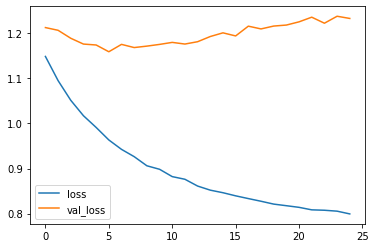

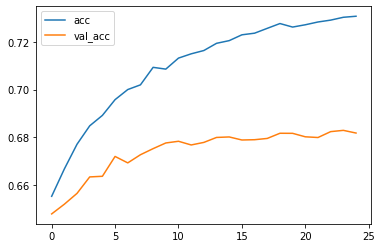

In [31]:
plt.plot(hist.history['loss'], label = 'loss') 
plt.plot(hist.history['val_loss'], label = 'val_loss') 
plt.legend()
plt.show()


plt.plot(hist.history['accuracy'], label = 'acc') 
plt.plot(hist.history['val_top_1_categorical_accuracy'], label = 'val_acc') 
plt.legend()
plt.show()

## Embeddings Representation Test

In [36]:
embeddings = model.layers[14].get_weights()[0]
embeddings

[]

In [37]:
embeddings[:,1]

TypeError: list indices must be integers or slices, not tuple

In [38]:
import matplotlib.pyplot as plt
plt.scatter(embeddings[:,0],embeddings[:,1]) 
plt.show()

TypeError: list indices must be integers or slices, not tuple

In [39]:
y = embeddings[:,0]
z = embeddings[:,1]
n = [6, 4, 1, 10,8,5,11,3,12,7,2,9]

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

TypeError: list indices must be integers or slices, not tuple

## Models Figure 

In [ ]:
plot_model(model, to_file='model3.png',show_shapes=True,show_layer_names=True)
Image(retina=True, filename='model3.png')

## Predictions and inverse transformations (converting the numerical prediction to the predicted category)

In [40]:
prediction = model.predict(input_list_test)
prediction[0]

array([2.5091875e-17, 0.0000000e+00, 3.6956489e-29, 5.6535961e-12,
       9.6873866e-22, 5.9370731e-10, 2.1373882e-11, 2.3382477e-18,
       3.9106264e-14, 3.8488151e-18, 1.0000000e+00, 4.6026367e-17,
       0.0000000e+00, 0.0000000e+00, 8.0945504e-21, 1.3594054e-14,
       1.4025349e-27, 9.3337692e-11, 2.3404008e-31, 8.6726711e-12,
       9.9861246e-16, 1.6008655e-12, 2.3652705e-13, 0.0000000e+00,
       2.2151551e-15, 1.4887393e-16, 1.1273967e-15, 7.2505363e-11,
       4.0754700e-10, 4.4046112e-35, 4.3788250e-29, 4.8874997e-16,
       3.4360341e-11, 3.5321968e-13, 3.0551506e-15, 2.0201914e-14,
       6.3412444e-14, 8.7290828e-15, 1.6404298e-35, 0.0000000e+00,
       0.0000000e+00, 7.6471791e-36], dtype=float32)

In [41]:
pred = np.around(prediction[12],decimals = 2)
pred

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.32, 0.  , 0.  ,
       0.  , 0.  , 0.34, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.31,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
      dtype=float32)

In [42]:
np.where(pred == 0.97)

(array([], dtype=int64),)

In [43]:
pred[25] = 1

In [44]:
ency.inverse_transform(np.around(pred.reshape(1, -1),decimals = 3)) #Prediction

array([['honey and royal jelly']], dtype=object)

In [45]:
ency.inverse_transform(np.around(y_test[25].reshape(1, -1),decimals = 1)) #Reality

array([['other food product / mixed']], dtype=object)

## Grid search tests

In [46]:
def create_model(activation = 'relu' ):
    input_models=[]
    output_embeddings=[]

    for categorical_var in categoical_vars:
        
        cat_emb_name= categorical_var.replace(" ", "")+'_Embedding'
        input_name= 'Input_' + categorical_var.replace(" ", "")
        no_of_unique_cat  = X_train[categorical_var].nunique()
        embedding_size = int(min(np.ceil((no_of_unique_cat)/2), 50 ))
        input_model = Input(shape=(1,), name=input_name)
        output_model = Embedding(no_of_unique_cat, embedding_size, name=cat_emb_name)(input_model)
        output_model = Reshape(target_shape=(embedding_size,))(output_model)    
        input_models.append(input_model)
        output_embeddings.append(output_model)



    output = Concatenate()(output_embeddings)
    output = Dense(2500,activation=activation)(output)
    output= Dropout(0.5)(output)
    output = Dense(1500,activation=activation)(output)
    output= Dropout(0.4)(output)
    output = Dense(1000,activation=activation)(output)
    output= Dropout(0.3)(output)
    output = Dense(42, activation='softmax')(output)
    model = Model(inputs=input_models, outputs=output)
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
    return model

In [47]:
model = KerasClassifier(build_fn=create_model, verbose=1,batch_size = 512, epochs = 1000)

In [48]:
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation = activation)

In [49]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=2)
grid_result = grid.fit(input_list_train,y_train,validation_data=(input_list_test,y_test))

ValueError: Found input variables with inconsistent numbers of samples: [4, 100911]

# Embeddings Model + conv (case 2)

In [56]:
input_models=[]
output_embeddings=[]

for categorical_var in categoical_vars:
    
    cat_emb_name= categorical_var.replace(" ", "")+'_Embedding'
    input_name= 'Input_' + categorical_var.replace(" ", "")
    no_of_unique_cat  = X_train[categorical_var].nunique()
    embedding_size = int(min(np.ceil((no_of_unique_cat)/2), 50 ))
    input_model = Input(shape=(1,), name=input_name)
    output_model = Embedding(no_of_unique_cat, embedding_size, name=cat_emb_name)(input_model)
    output_model = Reshape(target_shape=(embedding_size,))(output_model)    
    input_models.append(input_model)
    output_embeddings.append(output_model)

output = Concatenate()(output_embeddings)

output = Reshape(input_shape=(100,), target_shape=(100, 1))(output)


output = Conv1D(filters=128,kernel_size=4, activation = "relu")(output)
output = Conv1D(filters=128,kernel_size=4, activation = "relu")(output)
output = BatchNormalization()(output)
output = MaxPooling1D(pool_size=2)(output)

output = Conv1D(filters=256,kernel_size=3, activation = "relu")(output)
output = Conv1D(filters=256,kernel_size=3, activation = "relu")(output)
output = BatchNormalization()(output)
output = GlobalMaxPooling1D()(output)


output = Dense(512, activation = "relu")(output)

output = Dense(256, activation = "relu")(output)

output = Dense(42, activation='softmax')(output)

model = Model(inputs=input_models, outputs=output)


model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=[top_1_categorical_accuracy,top_2_categorical_accuracy,top_3_categorical_accuracy])

In [51]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_DATE_CASE (InputLayer)    [(None, 1)]          0                                            
__________________________________________________________________________________________________
Input_NOT_COUNTRY (InputLayer)  [(None, 1)]          0                                            
__________________________________________________________________________________________________
Input_DISTRIBUTION_STAT (InputL [(None, 1)]          0                                            
__________________________________________________________________________________________________
Input_COUNT_ORIGEN (InputLayer) [(None, 1)]          0                                            
____________________________________________________________________________________________

In [52]:
plot_model(model, to_file='model2.png',show_shapes=True,show_layer_names=True)
Image(retina=True, filename='model2.png')

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


FileNotFoundError: [Errno 2] No such file or directory: 'model2.png'

In [57]:
hist = model.fit(input_list_train,y_train,validation_data=(input_list_test,y_test) , epochs =  25, batch_size = 64, verbose= 1)

Epoch 1/25


InvalidArgumentError:  Input to reshape is a tensor with 5248 values, but the requested shape has 6400
	 [[node model_3/reshape_18/Reshape (defined at <ipython-input-57-4dbcded1c1b3>:1) ]] [Op:__inference_train_function_523283]

Function call stack:
train_function


In [ ]:
model.evaluate(x = input_list_testval, y = y_val)

In [ ]:
plt.plot(hist.history['loss'], label = 'loss') 
plt.plot(hist.history['val_loss'], label = 'val_loss') 
plt.legend()
plt.show()


plt.plot(hist.history['categorical_accuracy'], label = 'acc') 
plt.plot(hist.history['val_categorical_accuracy'], label = 'val_acc') 
plt.legend()
plt.show()